In [3]:
!pip install opencv-contrib-python
!pip install scikit-image
# Download a sample image
!wget https://people.csail.mit.edu/billf/project%20pages/sresCode/Markov%20Random%20Fields%20for%20Super-Resolution_files/iccv.maddie.small.jpg
# Download the EDSR model checkpoint for a 2x upscale
!wget -L https://raw.githubusercontent.com/Saafke/EDSR_Tensorflow/master/models/EDSR_x2.pb

--2025-11-22 17:36:22--  https://people.csail.mit.edu/billf/project%20pages/sresCode/Markov%20Random%20Fields%20for%20Super-Resolution_files/iccv.maddie.small.jpg
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving people.csail.mit.edu (people.csail.mit.edu)... 128.52.131.233
Connecting to people.csail.mit.edu (people.csail.mit.edu)|128.52.131.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13420 (13K) [image/jpeg]
Saving to: ‘iccv.maddie.small.jpg’

iccv.maddie.small.j 100%[===================>]  13.11K  --.-KB/s    in 0s      

2025-11-22 17:36:23 (40.4 MB/s) - ‘iccv.maddie.small.jpg’ saved [13420/13420]

--2025-11-22 17:36:24--  https://raw.githubusercontent.com/Saafke/EDSR_Tensorflow/master/models/EDSR_x2.pb
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githu

In [4]:
import cv2
import skimage
import matplotlib.pyplot as plt

Original Image shape: (29, 66, 3)


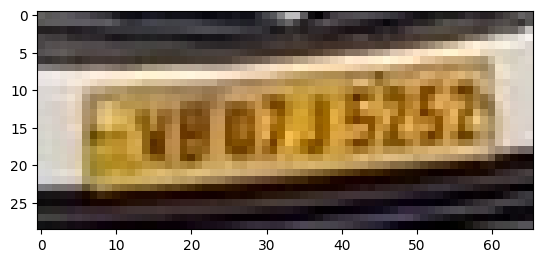

In [9]:
img = cv2.imread("sample_plate.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(f"Original Image shape: {img.shape}")
plt.imshow(img)


In [11]:
def interpolation(img, mode_type, factor=None):
    if mode_type == "Cubic Spline":
        # Only function that uses skimage instead of cv2
        img = skimage.transform.resize(img, (img.shape[0] * factor, img.shape[1] * factor), order=3, anti_aliasing=False)
        return img
    elif mode_type == "EDSRx4":
        # This functionality uses a Deep Learning model, so it does not make use of the
        # cv2.resize() API
        print(f"This mode only supports scale factor = 2, so all images will have this factor only")
        sr = cv2.dnn_superres.DnnSuperResImpl_create()
        path = "EDSR_x2.pb"
        sr.readModel(path)
        sr.setModel("edsr", 4)
        result = sr.upsample(img)
        return result
    elif mode_type == "Linear":
        mode = cv2.INTER_LINEAR
    elif mode_type == "Nearest":
        mode = cv2.INTER_NEAREST
    elif mode_type == "Cubic":
        mode = cv2.INTER_CUBIC
    elif mode_type == "Lanczos4":
        mode = cv2.INTER_LANCZOS4
    img = cv2.resize(img, (0, 0), fx=factor, fy=factor, interpolation=mode)
    return img

In [12]:
modes = [
    "Linear",
    "Nearest",
    "Cubic",
    "Lanczos4",
    "Cubic Spline",
    "EDSRx4",
]
factors = [
    2
]
image_dict = {}
for mode in modes:
    for factor in factors:
        image_dict[f"Original Image for {mode}"] = img # Log original image per mode
    image_dict[f"{mode} with {factor}x"] = interpolation(img, mode, factor)

This mode only supports scale factor = 2, so all images will have this factor only


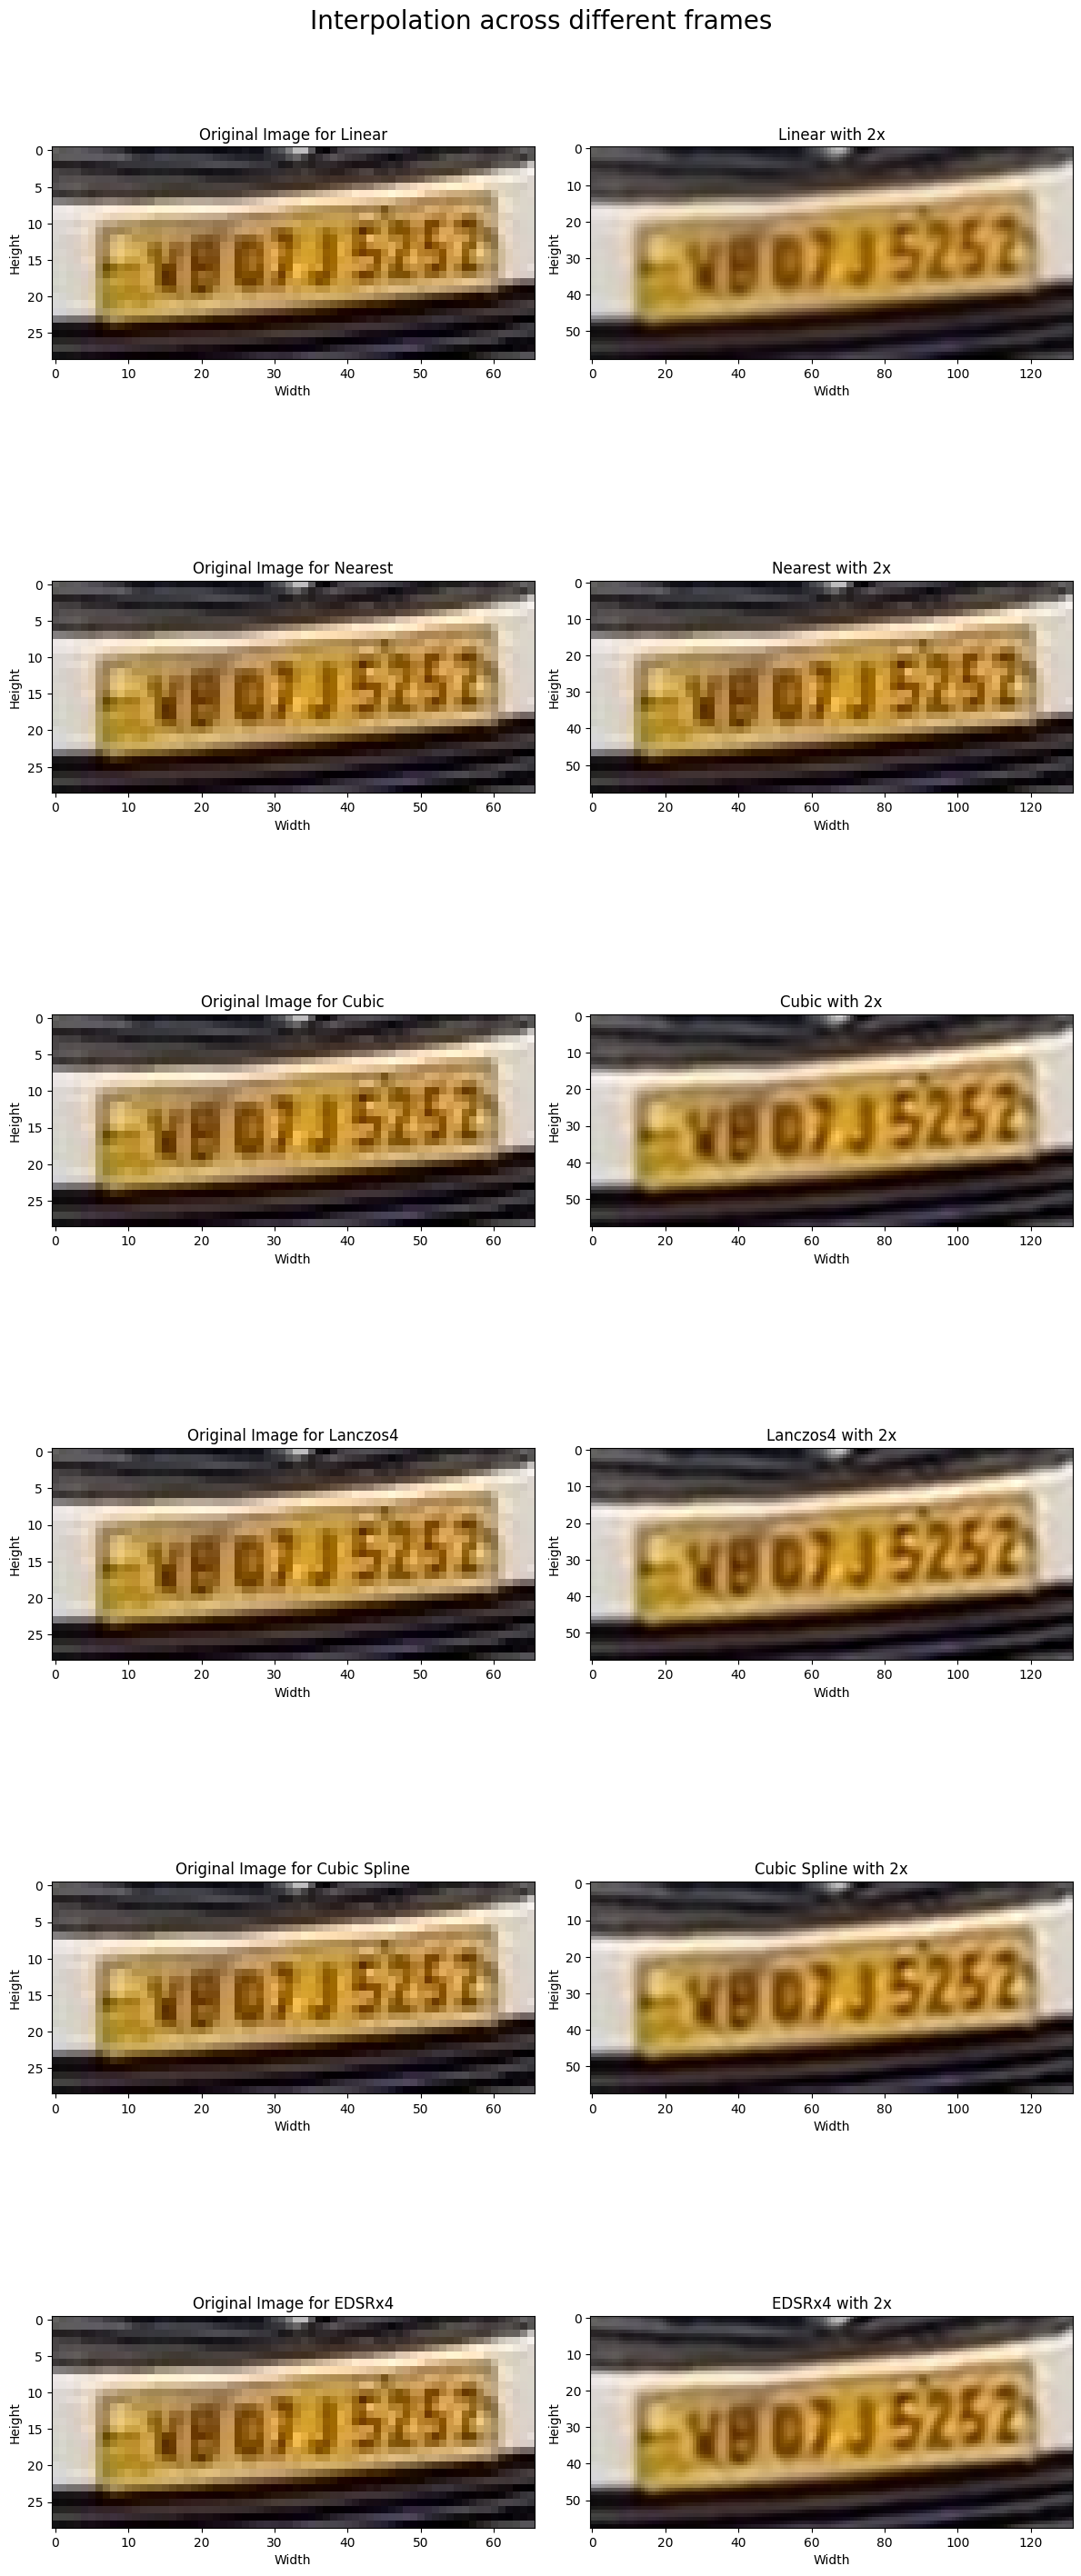

In [13]:
titles = list(image_dict.keys())
data = list(image_dict.values())
fig, axes = plt.subplots(6, 2, figsize=(12, 30))
for i in range(6):
    for j in range(2):
        index = i * 2 + j
        axes[i, j].imshow(data[index])  # Wrap around for cyclical data
        axes[i, j].set_title(titles[index])
        axes[i, j].set_xlabel("Width")
        axes[i, j].set_ylabel("Height")
fig.suptitle("Interpolation across different frames", fontsize=20)
plt.tight_layout()
plt.show()